In [8]:
!pip install kaggle

In [9]:
!kaggle

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [11]:
!kaggle datasets download -d susant4learning/holiday-package-purchase-prediction

Dataset URL: https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
License(s): CC0-1.0
holiday-package-purchase-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
import zipfile  # Import the zipfile module

### Extract the DataSEt
with zipfile.ZipFile('holiday-package-purchase-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall()
    print("Extracted succesfully")

Extracted succesfully


In [13]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
df= pd.read_csv('/content/Travel.csv')

In [15]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### **Data Cleaning**

In [16]:
###Handling missing values
###handle duplicate data
## Check datatype
## Understand the Dataset





In [17]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [18]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [19]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [20]:
df['CityTier'].value_counts()

CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64

In [21]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [22]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [23]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [24]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [25]:
### Checking the Missing values
## THese are the Features with nan- Values
features_with_nan = [features for features in df.columns if df[features].isnull().sum()]


for feature in features_with_nan:
    print(feature,np.round(df[feature].isnull().mean() * 100,5)),' %missing values'



Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


In [26]:
### Statics on numerical columns (Null Cols)

df[features_with_nan].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### **Imputing Null Values**

1.Impute Median value of Age Columns

2.Impute Mode for Type of Contract

3.Impute Median for Duration of Pitch

4.Impute Mode for numberofFollowup as it is Discrete Feature

5.impute Mode fpr Preferred PropertyStar

6.Impute Median for Numberoftips

7.Impute Mode for
NumberOfChlildrenVisiting

8.Impute Median for MontlyIncome

In [27]:
df.NumberOfFollowups.mode()[0]

4.0

In [28]:
### Age
df.Age.fillna(df.Age.median(),inplace = True)


## TypeofContract
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace = True)


## Duration of Pitch
df.	DurationOfPitch	.fillna(df.	DurationOfPitch	.median(),inplace = True)

## NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace = True)

## PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace = True)

## NumberOfTips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace = True)

## NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.median(),inplace = True)

## MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace = True)



In [29]:
df.head()


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [30]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

### **Feature Engineering**

Feature Extraction

In [31]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [32]:
### Create new colum for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns = ['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis = 1,inplace= True)

In [33]:
### Get All the numeric Features
num_features = [feature for feature in df.columns if df[feature].dtype !='O']
print('Number of Numerical Features :',len(num_features))

Number of Numerical Features : 13


In [34]:
### Get All the Categorical Features
cat_features = [feature for feature in df.columns if df[feature].dtype =='O']
print('Number of categorical Features :',len(cat_features))

Number of categorical Features : 6


In [35]:
### Get All the Disctctre Features in numeric columns
discrete_features = [feature for feature in num_features if df[feature].nunique() < 10]
print('Number of Discrete Features :',len(discrete_features))

Number of Discrete Features : 8


In [36]:
### Get all the Continious Featres in the Catogorical features
continious_features = [feature for feature in num_features if df[feature].nunique() > 10]
print('Number of Continious Features :',len(continious_features))

Number of Continious Features : 5


### **Model Training**

**Train Test Split**

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop(['ProdTaken'],axis = 1)
y= df['ProdTaken']

In [38]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [39]:
X.head()

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,200000,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,200001,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,200002,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,200003,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,200004,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [40]:
## Seperate Dataset into train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3910, 18), (978, 18), (3910,), (978,))

In [41]:
y_train.value_counts()

ProdTaken
0    3181
1     729
Name: count, dtype: int64

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [43]:
### Create Column Transformer with 3 types of transformers

cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = 'first')


preprocessor = ColumnTransformer(
    [
        ('onehot',OneHotEncoder(),cat_features)
        ,('scaler',StandardScaler(),num_features)
    ]
                                 )




In [44]:
preprocessor

ColumnTransformer(transformers=[('onehot', OneHotEncoder(),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('scaler', StandardScaler(),
                                 Index(['CustomerID', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

**Apply the fit anf transform on the train and test data**

In [45]:


## Applying the Transforming in training (fit_transform)
X_train = preprocessor.fit_transform(X_train)


In [46]:
X_test = preprocessor.transform(X_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,roc_auc_score



In [48]:

models ={
    "Random Forest":RandomForestClassifier()

 }


for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)
  #make predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #training the Set Performance
  model_train_acuracy = accuracy_score(y_train,y_train_pred)
  model_train_f1 = f1_score(y_train,y_train_pred,average ='weighted')
  model_train_precision = precision_score(y_train,y_train_pred)
  model_train_recall = recall_score(y_train,y_train_pred) #calculate Recall
  model_train_roc_auc = roc_auc_score(y_train,y_train_pred)

  #Test the Set Performanece

  model_test_accuracy = accuracy_score(y_test,y_test_pred)
  model_test_f1 = f1_score(y_test,y_test_pred,average ='weighted')
  model_test_precision = precision_score(y_test,y_test_pred)
  model_test_recall = recall_score(y_test,y_test_pred) #
  model_test_roc_auc = roc_auc_score(y_test,y_test_pred)


  print(list(models.keys())[i])


  print('Model Performance for Training set')
  print('Accuracy : {:.4f}'.format(model_train_acuracy))
  print('F1 Score : {:.4f}'.format(model_train_f1))
  print('Precision : {:.4f}'.format(model_train_precision))
  print('Recall : {:.4f}'.format(model_train_recall))
  print('ROC AUC : {:.4f}'.format(model_train_roc_auc))

  print('-'*40)

  print('Model Performance for Test Set')
  print('-Accuracy: {:.4f}'.format(model_test_accuracy))
  print('-F1 Score: {:.4f}'.format(model_test_f1))
  print('-Precision: {:.4f}'.format(model_test_precision))
  print('-Recall: {:.4f}'.format(model_test_recall))
  print('-ROC AUC: {:.4f}'.format(model_test_roc_auc))



  print('='*35)
  print('\n')






Random Forest
Model Performance for Training set
Accuracy : 1.0000
F1 Score : 1.0000
Precision : 1.0000
Recall : 1.0000
ROC AUC : 1.0000
----------------------------------------
Model Performance for Test Set
-Accuracy: 0.9100
-F1 Score: 0.9006
-Precision: 0.9558
-Recall: 0.5654
-ROC AUC: 0.7795




In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier



In [50]:
##Uisng the mutiple models here and fit and predict

models ={
    "Logistice Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),

    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier()

 }


for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)
  #make predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #traininh Set Performance
  model_train_acuracy = accuracy_score(y_train,y_train_pred)
  model_train_f1 = f1_score(y_train,y_train_pred,average ='weighted')
  model_train_precision = precision_score(y_train,y_train_pred)
  model_train_recall = recall_score(y_train,y_train_pred) #calculate Recall
  model_train_roc_auc = roc_auc_score(y_train,y_train_pred)

  #Test the Set Performanece

  model_test_accuracy = accuracy_score(y_test,y_test_pred)
  model_test_f1 = f1_score(y_test,y_test_pred,average ='weighted')
  model_test_precision = precision_score(y_test,y_test_pred)
  model_test_recall = recall_score(y_test,y_test_pred) #
  model_test_roc_auc = roc_auc_score(y_test,y_test_pred)


  print(list(models.keys())[i])


  print('Model Performance for Training set')
  print('Accuracy : {:.4f}'.format(model_train_acuracy))
  print('F1 Score : {:.4f}'.format(model_train_f1))
  print('Precision : {:.4f}'.format(model_train_precision))
  print('Recall : {:.4f}'.format(model_train_recall))
  print('ROC AUC : {:.4f}'.format(model_train_roc_auc))

  print('-'*40)

  print('Model Performance for Test Set')
  print('-Accuracy: {:.4f}'.format(model_test_accuracy))
  print('-F1 Score: {:.4f}'.format(model_test_f1))
  print('-Precision: {:.4f}'.format(model_test_precision))
  print('-Recall: {:.4f}'.format(model_test_recall))
  print('-ROC AUC: {:.4f}'.format(model_test_roc_auc))



  print('='*35)
  print('\n')






Logistice Regression
Model Performance for Training set
Accuracy : 0.8468
F1 Score : 0.8214
Precision : 0.7044
Recall : 0.3073
ROC AUC : 0.6389
----------------------------------------
Model Performance for Test Set
-Accuracy: 0.8354
-F1 Score: 0.8086
-Precision: 0.6786
-Recall: 0.2984
-ROC AUC: 0.6321


Decision Tree
Model Performance for Training set
Accuracy : 1.0000
F1 Score : 1.0000
Precision : 1.0000
Recall : 1.0000
ROC AUC : 1.0000
----------------------------------------
Model Performance for Test Set
-Accuracy: 0.9059
-F1 Score: 0.9037
-Precision: 0.7929
-Recall: 0.7016
-ROC AUC: 0.8285


Random Forest
Model Performance for Training set
Accuracy : 1.0000
F1 Score : 1.0000
Precision : 1.0000
Recall : 1.0000
ROC AUC : 1.0000
----------------------------------------
Model Performance for Test Set
-Accuracy: 0.9162
-F1 Score: 0.9077
-Precision: 0.9739
-Recall: 0.5864
-ROC AUC: 0.7913


Gradient Boost
Model Performance for Training set
Accuracy : 0.8923
F1 Score : 0.8796
Precision 

In [51]:
### Hyper PArameter Tuning for random  forest
rf_params = {
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}


adaboost_params = {

          "n_estimator":[50,60,70,80,90],
          "algorithm":["SAMME","SAMME.R"]
}

gradient_params = {
    "loss":['log_loss','deviance','exponential'],
    "criterion":['friedman_mse','mse','mae'],
    "n_estimators":[100,200,500,1000],
    "max_depth":[5,8,15,None,10]


}

In [52]:
adaboost_params

{'n_estimator': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}

In [53]:
gradient_params

{'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['friedman_mse', 'mse', 'mae'],
 'n_estimators': [100, 200, 500, 1000],
 'max_depth': [5, 8, 15, None, 10]}

In [54]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [55]:


## Models List for hyperparameters tuning

randomcv_models =[
    ("RF",RandomForestClassifier(),rf_params),
    ("AB",AdaBoostClassifier(),adaboost_params),
    ("GC",GradientBoostingClassifier(),gradient_params)
]


In [56]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimator': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}),
 ('GC',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'mse', 'mae'],
   'n_estimators': [100, 200, 500, 1000],
   'max_depth': [5, 8, 15, None, 10]})]

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
## Agian giving the paramter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Define your parameter grids
param_grid_rf = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 8, 15],
    'min_samples_split': [2, 8, 15, 20],
    'max_features': ['auto', 5, 7, 8]
}

param_grid_ab = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.01, 0.1, 1]
}

gradient_params = {
    "loss":['log_loss','deviance','exponential'],
    "criterion":['friedman_mse','mse','mae'],
    "n_estimators":[100,200,500,1000],
    "max_depth":[5,8,15,None,10]


}

# Create the classifiers
rf = RandomForestClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)

# Set up RandomizedSearchCV for RandomForest
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42
)

# Set up RandomizedSearchCV for AdaBoost
random_search_ab = RandomizedSearchCV(
    estimator=ab,
    param_distributions=param_grid_ab,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42
)

# Set up RandomizedSearchCV for Gradient Boosting
random_search_gc = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=gradient_params,
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42
)

# Fit the models
random_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest: ", random_search_rf.best_params_)

random_search_ab.fit(X_train, y_train)
print("Best parameters for AdaBoost: ", random_search_ab.best_params_)

random_search_gc.fit(X_train, y_train)
print("Best parameters for Gradient Boosting: ", random_search_gc.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=100; total time=   1.3s
[CV] END max_depth=8, max_features=8, min_samples_split=8, n_estimators=500; total time=   3.2s
[CV] END max_depth=8, max_features=8, min_samples_split=8, n_estimators=500; total time=   2.0s
[CV] END max_depth=8, max_features=8, min_samples_split=8, n_estimators=500; total time=   2.0s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=500; total time=   1.5s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=500; total time=   1.5s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=500; total time=   1.5s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_e

In [ ]:
'''from sklearn.model_selection import RandomizedSearchCV

model_parms = {}
for name,model,params in randomcv_models:
  random = RandomizedSearchCV(estimator = model,
                              param_distributions = params,
                              n_iter = 10,cv = 3,verbose = 2,
                              random_state = 42)
  random.fit(X_train,y_train)
  model_parms[name] = random.best_params_


  for model_name in model_parms:
    print(f"--------------------Best Paramas  for {model_name}------------------")
    print(model_name,model_parms[model_name])
    '''


In [ ]:

models = {
    "Random Forest":RandomForestClassifier(n_estimators=1000,
                                           min_samples_split=2,
                                           max_features=7,
                                           max_depth=None)

    #write the best paparmter here
    ,
    "AdaBoost":AdaBoostClassifier(n_estimators=100,
                                  learning_rate=1)
    ,

    "Gradient Boosting":GradientBoostingClassifier(loss='log_loss',
                                                   criterion='friedman_mse',
                                                   n_estimators=1000,
                                                   max_depth=5)

}



for i in range(len(list(models))):
  model = list(models.values())[i]
  model.fit(X_train,y_train)
  #make predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #traininh Set Performance
  model_train_acuracy = accuracy_score(y_train,y_train_pred)
  model_train_f1 = f1_score(y_train,y_train_pred,average ='weighted')
  model_train_precision = precision_score(y_train,y_train_pred)
  model_train_recall = recall_score(y_train,y_train_pred) #calculate Recall
  model_train_roc_auc = roc_auc_score(y_train,y_train_pred)

  #Test the Set Performanece

  model_test_accuracy = accuracy_score(y_test,y_test_pred)
  model_test_f1 = f1_score(y_test,y_test_pred,average ='weighted')
  model_test_precision = precision_score(y_test,y_test_pred)
  model_test_recall = recall_score(y_test,y_test_pred) #
  model_test_roc_auc = roc_auc_score(y_test,y_test_pred)


  print(list(models.keys())[i])


  print('Model Performance for Training set')
  print('Accuracy : {:.4f}'.format(model_train_acuracy))
  print('F1 Score : {:.4f}'.format(model_train_f1))
  print('Precision : {:.4f}'.format(model_train_precision))
  print('Recall : {:.4f}'.format(model_train_recall))
  print('ROC AUC : {:.4f}'.format(model_train_roc_auc))

  print('-'*40)

  print('Model Performance for Test Set')
  print('-Accuracy: {:.4f}'.format(model_test_accuracy))
  print('-F1 Score: {:.4f}'.format(model_test_f1))
  print('-Precision: {:.4f}'.format(model_test_precision))
  print('-Recall: {:.4f}'.format(model_test_recall))
  print('-ROC AUC: {:.4f}'.format(model_test_roc_auc))



  print('='*35)
  print('\n')






Random Forest
Model Performance for Training set
Accuracy : 1.0000
F1 Score : 1.0000
Precision : 1.0000
Recall : 1.0000
ROC AUC : 1.0000
----------------------------------------
Model Performance for Test Set
-Accuracy: 0.9202
-F1 Score: 0.9127
-Precision: 0.9748
-Recall: 0.6073
-ROC AUC: 0.8018


AdaBoost
Model Performance for Training set
Accuracy : 0.8770
F1 Score : 0.8627
Precision : 0.8024
Recall : 0.4513
ROC AUC : 0.7129
----------------------------------------
Model Performance for Test Set
-Accuracy: 0.8528
-F1 Score: 0.8346
-Precision: 0.7282
-Recall: 0.3927
-ROC AUC: 0.6785


Gradient Boosting
Model Performance for Training set
Accuracy : 1.0000
F1 Score : 1.0000
Precision : 1.0000
Recall : 1.0000
ROC AUC : 1.0000
----------------------------------------
Model Performance for Test Set
-Accuracy: 0.9376
-F1 Score: 0.9343
-Precision: 0.9452
-Recall: 0.7225
-ROC AUC: 0.8562




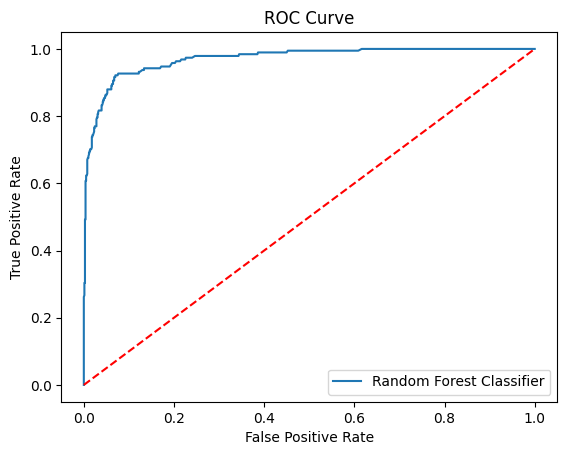

In [ ]:
## Plot the ROC- Auc Curve

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
plt.figure()

auc_models = [

              {

               'label':'Random Forest Classifier',
               'model':RandomForestClassifier(n_estimators=1000,
                                           min_samples_split=2,
                                           max_features=7,
                                           max_depth=None),
               'auc':0.6049
              },

]


#create loop through all model
for algo in auc_models:
  model = algo['model']
  model.fit(X_train,y_train)


  fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

  plt.plot(fpr,tpr,label = algo['label'])

  plt.plot([0,1],[0,1],'r--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()



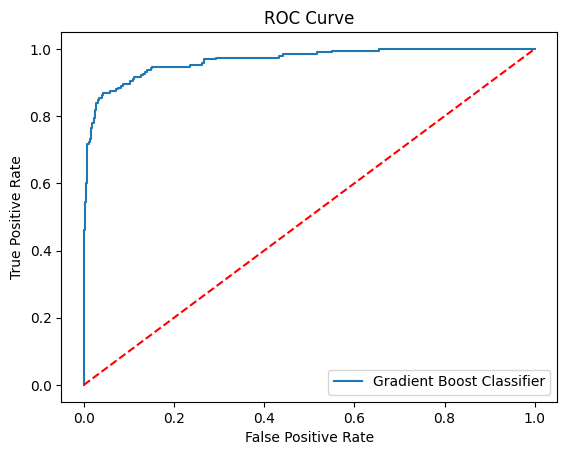

In [ ]:
## Plot the ROC- Auc Curve

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
plt.figure()

auc_models = [

              {

               'label':'Gradient Boost Classifier',
               'model':GradientBoostingClassifier(loss='log_loss',
                                                   criterion='friedman_mse',
                                                   n_estimators=1000,
                                                   max_depth=5),
               'auc':0.6049
              }

]


#create loop through all model
for algo in auc_models:
  model = algo['model']
  model.fit(X_train,y_train)


  fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

  plt.plot(fpr,tpr,label = algo['label'])

  plt.plot([0,1],[0,1],'r--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

